###**Sekar Ayun - 003**


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [22]:
df = pd.read_csv('loan_approval_dataset.csv')
df

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0
...,...,...,...,...,...,...,...
495,37,108236,High School,455,44668,Education,1
496,41,117579,Bachelor,666,24177,Car,1
497,29,26469,PhD,550,25022,Medical,0
498,52,50105,High School,633,41761,Medical,0


In [23]:
df.dtypes

,0
Age,int64
Income,int64
Education_Level,object
Credit_Score,int64
Loan_Amount,int64
Loan_Purpose,object
Loan_Approval,int64


In [24]:
df.isnull().sum()

,0
Age,0
Income,0
Education_Level,0
Credit_Score,0
Loan_Amount,0
Loan_Purpose,0
Loan_Approval,0


**Dari analisis yang telah dilakukan, dapat dilihat bahwa tidak ada data yang missing.**

# **Data Visualitation**

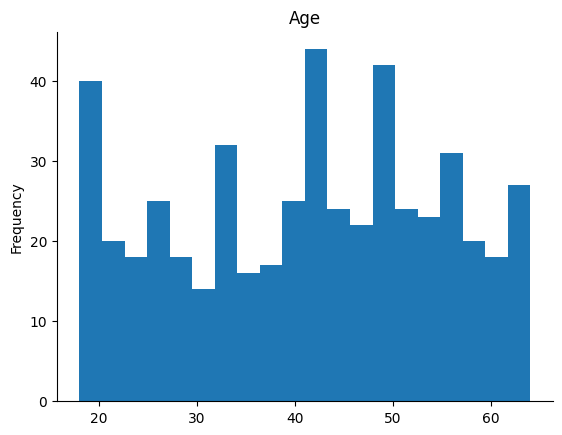

In [25]:
# Age Distribution
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

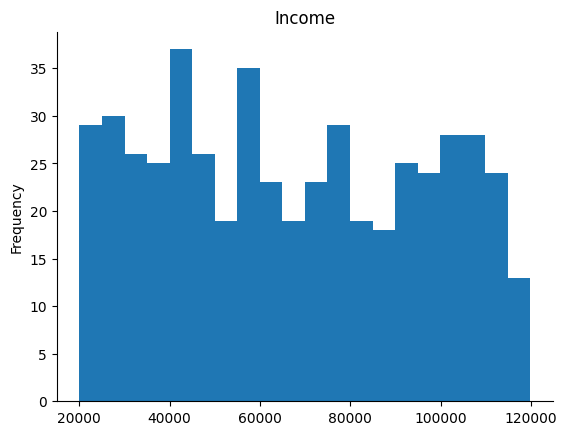

In [26]:
# Income Distribution
df['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

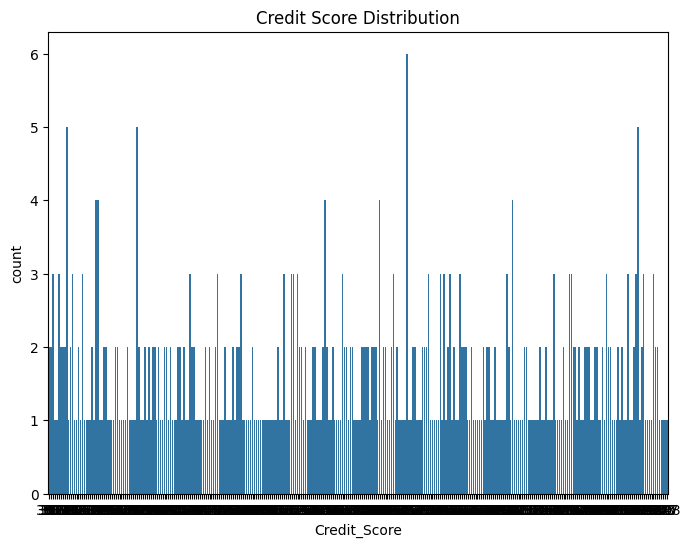

In [27]:
# Credit Score Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_Score', data=df)
plt.title('Credit Score Distribution')
plt.show()

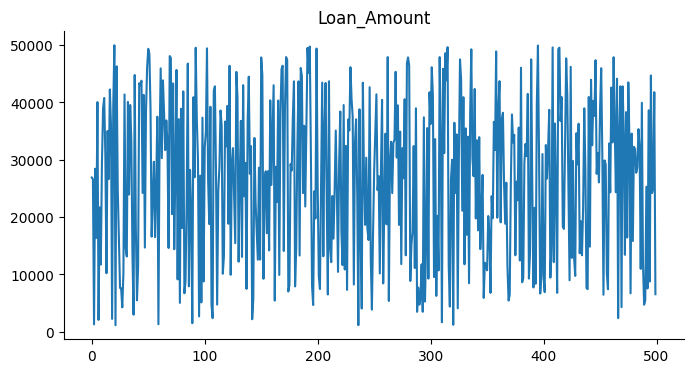

In [28]:
# Loan Amount Distribution
df['Loan_Amount'].plot(kind='line', figsize=(8, 4), title='Loan_Amount')
plt.gca().spines[['top', 'right']].set_visible(False)

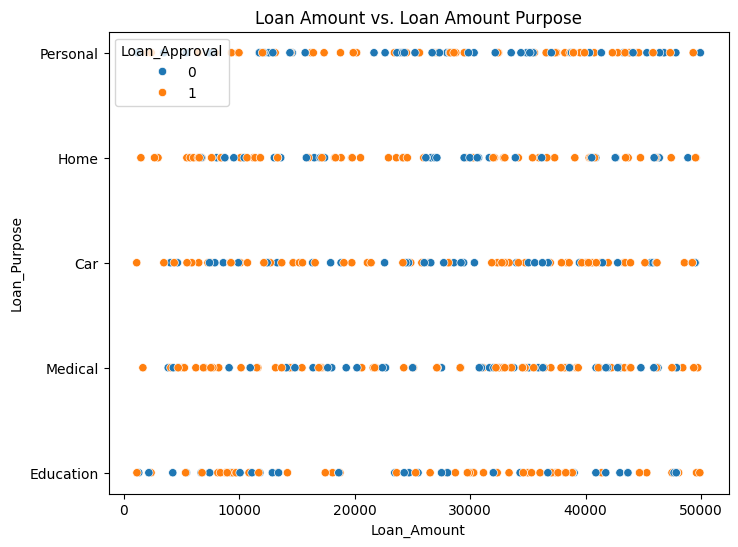

In [29]:
# Loan Amount vs. Loan Amount Purpose
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Loan_Amount', y='Loan_Purpose', data=df, hue='Loan_Approval')
plt.title('Loan Amount vs. Loan Amount Purpose')
plt.show()

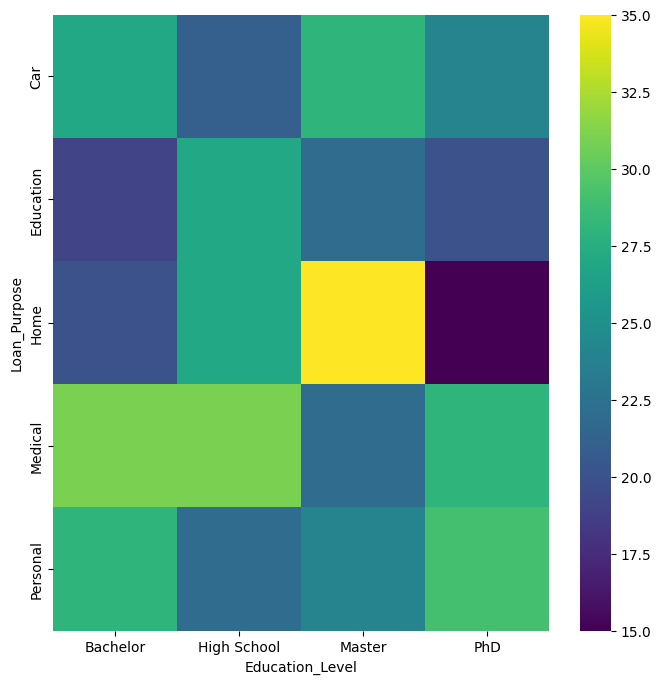

In [30]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Loan_Purpose'].value_counts()
    for x_label, grp in df.groupby('Education_Level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education_Level')
_ = plt.ylabel('Loan_Purpose')

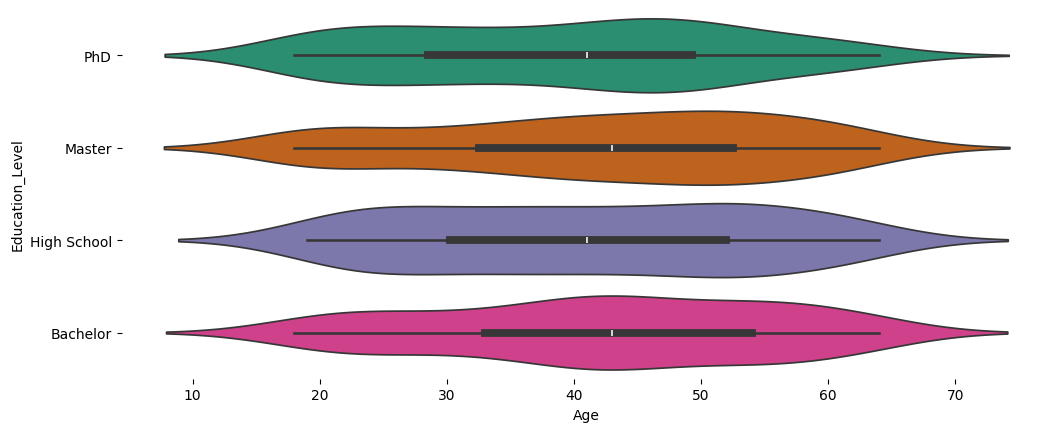

In [31]:
figsize = (12, 1.2 * len(df['Education_Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Education_Level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

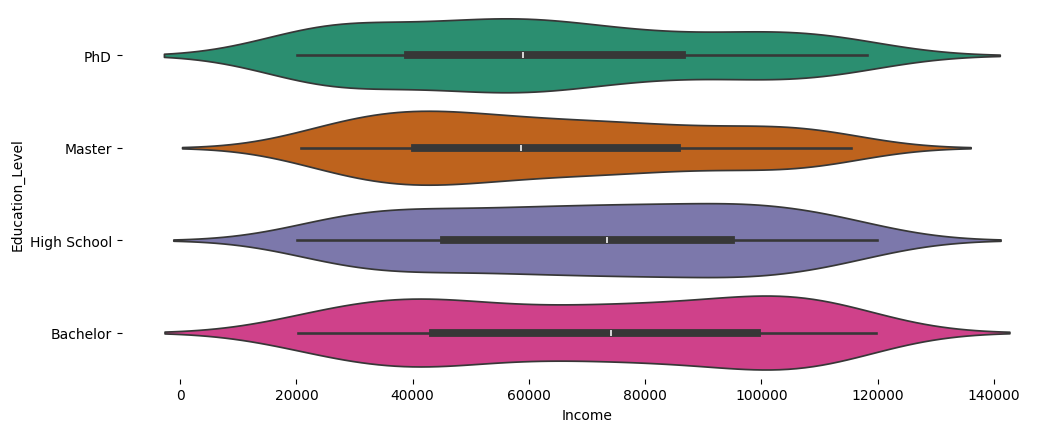

In [32]:
figsize = (12, 1.2 * len(df['Education_Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Income', y='Education_Level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Data Prepocessing**

### **Melakukan encoding pada fitur kategorikal**

In [33]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Kolom-kolom kategorikal yang akan diubah
categorical_cols = ['Education_Level', 'Loan_Purpose']

# Loop melalui setiap kolom kategorikal dan lakukan encoding
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Menampilkan DataFrame yang sudah diubah
print(df.head())


   Age  Income  Education_Level  Credit_Score  Loan_Amount  Loan_Purpose  \
0   56   24000                3           333        26892             4   
1   46   90588                2           316        26619             2   
2   32  113610                3           452         1281             4   
3   60  117856                1           677        28420             4   
4   25   58304                3           641        16360             0   

   Loan_Approval  
0              0  
1              1  
2              1  
3              0  
4              0  


### **Melakukan feature scaling pada fitur numerik**

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom numerik yang ingin di-scaling
numeric_cols = ['Age', 'Income', 'Loan_Amount', 'Credit_Score']

# Fit dan transform data numerik
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Menampilkan DataFrame yang sudah di-scaling
print(df.head())

        Age    Income  Education_Level  Credit_Score  Loan_Amount  \
0  0.826087  0.039537                3      0.058501     0.527872   
1  0.608696  0.706885                2      0.027422     0.522279   
2  0.304348  0.937613                3      0.276051     0.003196   
3  0.913043  0.980166                1      0.687386     0.559175   
4  0.152174  0.383333                3      0.621572     0.312109   

   Loan_Purpose  Loan_Approval  
0             4              0  
1             2              1  
2             4              1  
3             4              0  
4             0              0  


### **Membagi dataset menjadi training set (80%) dan testing set (20%)**

In [35]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df.drop('Loan_Approval', axis=1)  # Asumsi 'Loan_Approval' adalah kolom target
y = df['Loan_Approval']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state untuk reproduksibilitas

# Sekarang Anda memiliki X_train, X_test, y_train, dan y_test
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 400
Jumlah data testing: 100


**Dapat diketahui bahwa terdapat data trainning sebanyak 400 dan data testing sebanyak 100**

#**Logistic Regression**

In [39]:
model = LogisticRegression()

In [40]:
# Latih model dengan data training
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

In [43]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.64


In [44]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.64      1.00      0.78        63

    accuracy                           0.64       100
   macro avg       0.82      0.51      0.42       100
weighted avg       0.77      0.64      0.51       100



In [45]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 1 36]
 [ 0 63]]


#**Decission Tree**

In [85]:
model_dt = DecisionTreeClassifier(random_state=28) # random_state untuk reproduksibilitas

In [86]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=28)

In [87]:
# Prediksi pada data testing
y_pred_dt = model_dt.predict(X_test)

In [88]:
# Evaluasi performa model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree):", accuracy_dt)

Accuracy (Decision Tree): 0.57


In [89]:
# Classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.42      0.46      0.44        37
           1       0.67      0.63      0.65        63

    accuracy                           0.57       100
   macro avg       0.55      0.55      0.55       100
weighted avg       0.58      0.57      0.57       100



In [90]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred_dt))

[[17 20]
 [23 40]]


#**Random Forest Regressor**

In [121]:
model_rf = RandomForestRegressor(random_state=45)  # random_state untuk reproduksibilitas

In [122]:
# Latih model dengan data training
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=45)

In [123]:
# Prediksi pada data testing
y_pred_rf = model_rf.predict(X_test)

In [124]:
# Evaluasi performa model
y_pred_rf_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_rf]
accuracy_rf = accuracy_score(y_test, y_pred_rf_binary)
print("Accuracy (Random Forest):", accuracy_rf)

Accuracy (Random Forest): 0.55


In [127]:
# Classification report (mencakup precision, recall, F1-score)
y_pred_rf_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_rf]
print(classification_report(y_test, y_pred_rf_binary)) # Use binary predictions for classification report

              precision    recall  f1-score   support

           0       0.38      0.32      0.35        37
           1       0.63      0.68      0.66        63

    accuracy                           0.55       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.54      0.55      0.54       100



In [129]:
# Confusion matrix
y_pred_rf_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_rf]
print(confusion_matrix(y_test, y_pred_rf_binary))

[[12 25]
 [20 43]]


#**XG-Boost**

In [146]:
model_xgb = xgb.XGBClassifier(random_state=42)  # random_state untuk reproduksibilitas

In [147]:
# Latih model dengan data training
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [148]:
# Prediksi pada data testing
y_pred_xgb = model_xgb.predict(X_test)

In [149]:
# Evaluasi performa model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy (XGBoost):", accuracy_xgb)

Accuracy (XGBoost): 0.56


In [150]:
# Classification report (mencakup precision, recall, F1-score)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.42      0.49      0.45        37
           1       0.67      0.60      0.63        63

    accuracy                           0.56       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.57      0.56      0.57       100



In [151]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred_xgb))

[[18 19]
 [25 38]]


**Berdasarkan hasil evaluasi model, dapat disimpulkan bahwa Logistic Regression memiliki performa terbaik dibandingkan model lainnya. Hal ini dapat dilihat dari nilai akurasi tertinggi sebesar 64%, yang lebih baik dibandingkan Decision Tree (57%), Random Forest (55%), dan XGBoost (56%).**  


**Selain itu, Logistic Regression memiliki recall sempurna (1.00) untuk kelas 1, yang berarti model ini mampu mengidentifikasi semua sampel yang benar-benar termasuk dalam kelas tersebut tanpa ada yang terlewat. Hal ini sangat penting dalam kasus di mana mendeteksi kelas 1 lebih diprioritaskan, misalnya dalam menentukan apakah seseorang layak mendapatkan pinjaman atau dalam sistem kesehatan yang membutuhkan deteksi dini kasus berisiko tinggi.**  


**Meskipun model ini memiliki kelemahan dalam mengenali kelas 0 (hanya mampu mendeteksi 1 dari 37 sampel kelas 0 dengan benar), jika tujuan utama adalah memastikan semua kasus kelas 1 terdeteksi, maka Logistic Regression adalah pilihan terbaik. Dengan precision kelas 1 sebesar 64% dan F1-score 78%, model ini mampu memberikan keseimbangan yang baik antara presisi dan sensitivitas terhadap kelas yang lebih penting dalam konteks ini.**  


**Dengan demikian, dari semua model yang diuji, Logistic Regression adalah model yang paling optimal berdasarkan akurasi keseluruhan dan kemampuannya mendeteksi kelas 1 dengan sempurna.**

#**Tuning Model dengan Grid Search atau Random Search (Logistic Regression)**

In [152]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # 'l1' penalty requires 'liblinear' or 'saga' solver
}

# Initialize Logistic Regression model
logreg_grid = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_logreg_grid = grid_search.best_estimator_
y_pred_grid = best_logreg_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Test Accuracy:", accuracy_grid)
print(classification_report(y_test, y_pred_grid))


# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-4, 4, 20),  # 20 values between 10^-4 and 10^4
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg_grid, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)


# Print the best hyperparameters and best score
print("\nBest hyperparameters (Random Search):", random_search.best_params_)
print("Best score (Random Search):", random_search.best_score_)

# Evaluate the best model on the test set
best_logreg_random = random_search.best_estimator_
y_pred_random = best_logreg_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print("Test Accuracy (Random Search):", accuracy_random)
print(classification_report(y_test, y_pred_random))


Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.59
Test Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100


Best hyperparameters (Random Search): {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}
Best score (Random Search): 0.59
Test Accuracy (Random Search): 0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



#**Re-train Model**

In [161]:
# Re-train the model using the best parameters from Grid Search
best_params_grid = {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
logreg_grid_best = LogisticRegression(**best_params_grid)
logreg_grid_best.fit(X_train, y_train)
y_pred_grid_best = logreg_grid_best.predict(X_test)

print("\nEvaluation with Best Grid Search parameters:")
print("Accuracy (Grid Search):", accuracy_score(y_test, y_pred_grid_best))
print(classification_report(y_test, y_pred_grid_best))
print(confusion_matrix(y_test, y_pred_grid_best))


Evaluation with Best Grid Search parameters:
Accuracy (Grid Search): 0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100

[[ 0 37]
 [ 0 63]]


In [162]:
best_params_random = random_search.best_params_
logreg_random_best = LogisticRegression(**best_params_random)
logreg_random_best.fit(X_train, y_train)
y_pred_random_best = logreg_random_best.predict(X_test)

print("\nEvaluation with Best Random Search parameters:")
print("Accuracy (Random Search):", accuracy_score(y_test, y_pred_random_best))
print(classification_report(y_test, y_pred_random_best))
print(confusion_matrix(y_test, y_pred_random_best))


Evaluation with Best Random Search parameters:
Accuracy (Random Search): 0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100

[[ 0 37]
 [ 0 63]]


**Setelah dilakukan tuning menggunakan Grid Search dan Random Search, parameter terbaik yang ditemukan untuk model Logistic Regression adalah solver 'liblinear', penalty 'l2', dan C sekitar 0.1. Model dengan parameter ini menghasilkan akurasi sebesar 63% pada data uji, yang sekilas terlihat cukup baik. Namun, jika dilihat lebih dalam, model ini memiliki kelemahan dalam mengenali salah satu kelas.**  

**Model mampu memprediksi semua data kelas 1 (disetujui) dengan benar, tetapi sangat buruk dalam mengenali kelas 0 (tidak disetujui). Ini terlihat dari recall 100% untuk kelas 1, sedangkan kelas 0 tidak terdeteksi sama sekali dengan precision dan recall 0.00. Artinya, model cenderung hanya memberikan prediksi "disetujui" tanpa benar-benar mempertimbangkan kemungkinan "tidak disetujui".**  

**Ketidakseimbangan ini juga tampak pada skor f1, di mana macro average f1-score hanya 0.39, jauh lebih rendah dibandingkan weighted f1-score 0.49. Ini menunjukkan bahwa model lebih fokus pada kelas yang lebih banyak, yaitu kelas 1, dan mengabaikan kelas yang lebih sedikit. Kemungkinan besar, masalah ini terjadi karena jumlah data pada kelas 1 lebih banyak dibanding kelas 0, sehingga model lebih cenderung memilih kelas yang lebih dominan untuk meningkatkan akurasi keseluruhan.**

#**Perbandingan Performa Sebelum dan Sesudah Tuning**

**Setelah dilakukan perbandingan antara model sebelum dan sesudah tuning, dapat dilihat bahwa tuning tidak memberikan peningkatan performa yang signifikan. Bahkan, dalam beberapa aspek, performa model justru menurun, terutama dalam mendeteksi kelas 0.**  

**Sebelum tuning, model memiliki akurasi sebesar 64%, yang cukup tinggi. Namun, terdapat ketidakseimbangan dalam performanya. Precision untuk kelas 0 mencapai 1.00, tetapi recall hanya 0.03. Artinya, model sangat jarang mengidentifikasi kelas 0 dengan benar, sehingga sebagian besar prediksi kelas 0 justru salah. Sebaliknya, model sangat baik dalam mengenali kelas 1, dengan recall 100% dan precision 0.64, yang berarti semua sampel kelas 1 berhasil diklasifikasikan dengan benar, tetapi dengan beberapa kesalahan klasifikasi dari kelas lain.**  

**Setelah tuning, model mengalami sedikit penurunan akurasi menjadi 63%. Namun, yang lebih penting adalah perubahan dalam distribusi prediksi. Precision dan recall untuk kelas 0 menjadi 0.00, yang berarti model sama sekali tidak mampu mengenali kelas 0. Model sepenuhnya mengabaikan kelas 0 dan selalu memprediksi kelas 1. Sebaliknya, performa untuk kelas 1 tetap hampir sama dengan precision 0.63 dan recall 100%.**

**Dampak dari perubahan ini juga terlihat pada macro average f1-score, yang menurun dari 0.42 menjadi 0.39. Hal ini menunjukkan bahwa model semakin tidak seimbang dalam mendeteksi kedua kelas. Weighted average f1-score juga turun dari 0.51 menjadi 0.49, yang menandakan bahwa meskipun akurasi hanya turun sedikit, kualitas klasifikasi secara keseluruhan memburuk.**  

**Penyebab utama dari permasalahan ini kemungkinan besar adalah ketidakseimbangan data, di mana jumlah sampel kelas 1 lebih banyak dibanding kelas 0. Sebelum tuning, model masih memiliki sedikit kemampuan untuk mendeteksi kelas 0 meskipun tidak optimal. Namun, setelah tuning, model semakin cenderung memprediksi semua sampel sebagai kelas 1 demi meningkatkan akurasi, yang secara tidak langsung menyebabkan performa model semakin tidak seimbang.**  

**Dari hasil ini, tuning yang dilakukan tidak memberikan perbaikan, melainkan membuat model semakin bias terhadap kelas mayoritas. Oleh karena itu, model setelah tuning tidak dapat dianggap lebih baik dibanding model sebelum tuning, karena meskipun akurasinya hampir sama, kemampuannya dalam membedakan kedua kelas menjadi lebih buruk.**